In [1]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

In [2]:
HEADERS=['Planta', 'Operador', 'Fecha', 'Hora', 'Caudal_AC', 'Alcalinidad_AC', 'Conductividad_AC', 'PH_AC', 'Color_AC', 
         'Turbiedad_AC', 'Prueba', 'Dosis', 'Turbiedad_AT', 'PH_AT', 'Color_AT', 'Alcalinidad_AT', 'Tiempo_formacion_floc',
         'Descarga_Maquina']

HEADERS_FINALES = ['Fecha', 'Hora', 'Caudal_AC', 'Alcalinidad_AC', 'Conductividad_AC', 'PH_AC', 'Color_AC', 'Turbiedad_AC',
                   'Dosis', 'Turbiedad_AT', 'PH_AT', 'Color_AT','Alcalinidad_AT', 'Tiempo_formacion_floc','Descarga_Maquina']

In [3]:
archivos_por_año = [
    ('../../data_edit/2020/', ['Julio2020.xlsx', 'Agosto2020.xlsx', 'Septiembre2020.xlsx', 'Octubre2020.xlsx', 'Noviembre2020.xlsx', 'Diciembre2020.xlsx']),
    ('../../data_edit/2021/', ['Enero2021.xlsx', 'Febrero2021.xlsx', 'Marzo2021.xlsx', 'Abril2021.xlsx', 'Mayo2021.xlsx', 'Junio2021.xlsx', 'Julio2021.xlsx', 'Agosto2021.xlsx', 'Septiembre2021.xlsx', 'Octubre2021.xlsx', 'Noviembre2021.xlsx', 'Diciembre2021.xlsx']),
    ('../../data_edit/2022/', ['Enero2022.xlsx', 'Febrero2022.xlsx', 'Marzo2022.xlsx', 'Abril2022.xlsx', 'Mayo2022.xlsx', 'Junio2022.xlsx']),
]

# Lista para almacenar los dataframes
dfs = []

In [4]:
def detectar_fila_cabecera(archivo_excel, hoja_nombre):
    wb = load_workbook(filename=archivo_excel, read_only=True)
    fila_cabecera = None
    palabra_clave = 'Planta'

    for hoja in wb:
        if hoja.title == hoja_nombre:
            for index, row in enumerate(hoja.iter_rows(), start=1):
                if any(palabra_clave in str(cell.value) for cell in row if cell.value is not None):
                    fila_cabecera = index
                    break

    return fila_cabecera

In [5]:
def procesar_archivo(nombre_archivo):
    xls = pd.ExcelFile(nombre_archivo)
    sheet_names = xls.sheet_names
    list_of_dfs = []  # Lista para almacenar los dataframes
    df = pd.DataFrame

    for sheet in sheet_names:
        if sheet == 'ENSAYO DE JARRAS':
            header_row = detectar_fila_cabecera(nombre_archivo, sheet)
            df = pd.read_excel(nombre_archivo, sheet_name=sheet, skiprows=header_row, names=HEADERS)
            df.dropna(how='all', inplace=True)
            df = df.loc[df['Planta'] != 'Planta']
            df['Fecha'] = df.groupby((df['Planta'] == 'TABLAZO').cumsum())['Fecha'].ffill()
            df['Hora'] = df.groupby((df['Planta'] == 'TABLAZO').cumsum())['Hora'].ffill()
            df['Descarga_Maquina'] = df.groupby((df['Planta'] == 'TABLAZO').cumsum())['Descarga_Maquina'].ffill()
            df = df.loc[df['Planta'] != 'TABLAZO']
            df = df.loc[df['Turbiedad_AT'].notna()]
            df['Caudal_AC'] = df['Caudal_AC'].ffill()
            df['Alcalinidad_AC'] = df['Alcalinidad_AC'].ffill()
            df['Conductividad_AC'] = df['Conductividad_AC'].ffill()
            df['PH_AC'] = df['PH_AC'].ffill()
            df['Color_AC'] = df['Color_AC'].ffill()
            df['Turbiedad_AC'] = df['Turbiedad_AC'].ffill()
            df=df[HEADERS_FINALES].reset_index(drop=True)

            list_of_dfs.append(df)

    return pd.concat(list_of_dfs, ignore_index=True)

In [6]:
# Procesar cada archivo
for carpeta, archivos in archivos_por_año:
    for archivo in archivos:
        print(carpeta + archivo)
        dfs.append(procesar_archivo(carpeta + archivo))

# Concatenar todos los dataframes en uno solo
df_final = pd.concat(dfs, ignore_index=True)

../../data_edit/2020/Julio2020.xlsx
../../data_edit/2020/Agosto2020.xlsx
../../data_edit/2020/Septiembre2020.xlsx
../../data_edit/2020/Octubre2020.xlsx
../../data_edit/2020/Noviembre2020.xlsx
../../data_edit/2020/Diciembre2020.xlsx
../../data_edit/2021/Enero2021.xlsx
../../data_edit/2021/Febrero2021.xlsx
../../data_edit/2021/Marzo2021.xlsx
../../data_edit/2021/Abril2021.xlsx
../../data_edit/2021/Mayo2021.xlsx
../../data_edit/2021/Junio2021.xlsx
../../data_edit/2021/Julio2021.xlsx
../../data_edit/2021/Agosto2021.xlsx
../../data_edit/2021/Septiembre2021.xlsx
../../data_edit/2021/Octubre2021.xlsx
../../data_edit/2021/Noviembre2021.xlsx
../../data_edit/2021/Diciembre2021.xlsx
../../data_edit/2022/Enero2022.xlsx
../../data_edit/2022/Febrero2022.xlsx
../../data_edit/2022/Marzo2022.xlsx
../../data_edit/2022/Abril2022.xlsx
../../data_edit/2022/Mayo2022.xlsx
../../data_edit/2022/Junio2022.xlsx


In [7]:
# df = procesar_archivo()
df_final = df_final[['Fecha', 'Hora','Caudal_AC', 'Alcalinidad_AC','Conductividad_AC', 'PH_AC', 'Color_AC', 'Turbiedad_AC','Dosis', 'Turbiedad_AT', 'PH_AT', 'Color_AT','Alcalinidad_AT','Descarga_Maquina']]

In [8]:
df_final

,Fecha,Hora,Caudal_AC,Alcalinidad_AC,Conductividad_AC,PH_AC,Color_AC,Turbiedad_AC,Dosis,Turbiedad_AT,PH_AT,Color_AT,Alcalinidad_AT,Descarga_Maquina
0,2020-07-18 00:00:00,7:00 A.M,610L/S,79.4,1.8,7.5,6.7,40,15,3.38,7.84,10.12,39,915gr/min
1,2020-07-18 00:00:00,7:00 A.M,610L/S,79.4,1.8,7.5,6.7,40,20,2.1,7.75,9.85,38,915gr/min
2,2020-07-18 00:00:00,7:00 A.M,610L/S,79.4,1.8,7.5,6.7,40,25,1.68,7.62,8.44,37,915gr/min
3,2020-07-18 00:00:00,7:00 A.M,610L/S,79.4,1.8,7.5,6.7,40,30,1.95,7.54,9.75,36,915gr/min
4,2020-07-18 00:00:00,7:00 A.M,610L/S,79.4,1.8,7.5,6.7,40,35,2.28,7.42,10.1,35,915gr/min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9500,2022-06-29 00:00:00,5:00 A.M,500,30,60.7,7.5,8,3.0,15,1.95,7.35,5,25,NaN
9501,2022-06-29 00:00:00,5:00 A.M,500,30,60.7,7.5,8,3.0,20,1.35,7.28,3,23,600
9502,2022-06-29 00:00:00,5:00 A.M,500,30,60.7,7.5,8,3.0,25,1.88,7.11,6,21,gr/mn
9503,2022-06-29 00:00:00,5:00 A.M,500,30,60.7,7.5,8,3.0,30,2.00,7.03,9,19,gr/mn


In [9]:
# def clean_hour(hour):
#     # Verifica si la hora es una cadena
#     if not isinstance(hour, str):
#         return hour

#     # Convierte a mayúsculas
#     hour = hour.upper()
#     # Elimina espacios extra
#     hour = hour.replace(' ', '')
#     hour = hour.strip()
#     # Reemplaza 'OO' con '00'
#     hour = hour.replace('OO', '00')
#     # Reemplaza 'OM' con 'PM'
#     hour = hour.replace('OM', 'PM')
#     # Reemplaza 'OM' con 'PM'
#     hour = hour.replace("'", '')

#     # Elimina puntos, comas, puntos y comas, y guiones
#     hour = re.sub(r'[´.,;-]', '', hour)
    
#     # Si la hora ya está en formato de 24 horas, solo quita el 'AM' o 'PM'
#     if re.match(r'\d{1,2}:\d{2}(AM|PM)', hour):
#         hour = hour[:-2]
#         return hour
    
#     if ":" not in hour and len(hour) > 2:
#         # Asume que el formato es HHAM, HHMMAM, HHPM, HHMMPM, HHMMSSAM o HHMMSSPM
#         # y agrega dos puntos entre las horas y los minutos, ignorando los segundos si están presentes
#         hour = re.sub(r'(\d{1,2})(\d{2})(\d{2})?(AM|PM)', r'\1:\2\4', hour)

#     # Agrega los dos puntos entre las horas y los minutos si no están
#     if ":" not in hour and len(hour) > 2:
#         # Asume que el formato es HHA.M. o HHAM, y agrega dos puntos entre las horas y los minutos
#         hour = re.sub(r'(\d{1,2})(AM|PM)', r'\1:00\2', hour)
        
#     # Elimina los ceros adicionales en los minutos
#     hour = re.sub(r':0+(\d{2})', r':\1', hour)

#     # Cambia '18' a '' si es PM
#     if 'PM' in hour and hour.startswith('18'):
#         hour = '08' + hour[2:]

#     hour = hour.replace('AAM', 'AM')
#     hour = hour.replace('AN', 'AM')
#     hour = hour.replace('M', 'PM')
#     # Si la hora termina en AM o PM, quita los segundos (si los hay) y luego convierte la hora a formato de 24 horas
#     if re.match(r'.*AM$|.*PM$', hour):
#         hour = re.sub(r':\d{2}(AM|PM)$', r'\1', hour)  # Elimina los segundos
#         hour = re.sub(r':(AM|PM)$', r'\1', hour)  # Elimina los dos puntos extra antes de AM o PM
#         if ":" not in hour:
#             hour = re.sub(r'(\d{1,2})(AM|PM)', r'\1:00\2', hour)  # Asegura que hay minutos
#         hour = datetime.datetime.strptime(hour, '%I:%M%p').strftime('%H:%M')
#         hour = re.sub(r'(\d{1,2})(:)(\d{2})(:)(\d{2})', r'\1:\3', hour)

#     return hour

# # Aplica la limpieza a la columna 'Hora'
# df_final['Hora'] = df_final['Hora'].apply(clean_hour)

# # Limpia la columna 'Fecha'
# df_final['Fecha'] = pd.to_datetime(df_final['Fecha'], errors='coerce').dt.strftime('%Y-%m-%d')


In [10]:
def cell_clean(cell):
    # Si la celda es de tipo datetime.time o datetime.datetime, simplemente devolverla como está
    if isinstance(cell, (datetime.time, datetime.datetime)):
        return cell

    # Reemplaza 'NO HAY AGUA' por 0
    if isinstance(cell, str) and cell.strip().upper() == 'NO HAY AGUA':
        return 0

    # Verifica si la celda contiene un valor NaN. Si la celda es NaN, la retorna tal cual
    if pd.isna(cell):
        return cell

    # Solo intenta reemplazar si la celda es una cadena
    if isinstance(cell, str):
        # Buscar y eliminar caracteres no deseados (solo conserva números y puntos)
        cell = cell.replace(',', '.')
        cell_cleaned = re.sub(r'[^0-9.]', '', str(cell))
    else:
        cell_cleaned = cell

    # Convertir la celda a un número si es posible, de lo contrario, devuelve un NaN
    try:
        if isinstance(cell_cleaned, (datetime.time, datetime.datetime)):
            return cell_cleaned
        else:
            return float(cell_cleaned) if '.' in str(cell_cleaned) else int(cell_cleaned)
    except ValueError:
        return np.nan # Aplicación de función anterior

In [11]:
def apply_clean(df):
    columns_object = df.select_dtypes(include='object').columns
    df[columns_object] = df[columns_object].applymap(cell_clean)
    
    for column in df.columns:
        # Si la columna contiene objetos de fecha y hora, pasar a la siguiente columna
        if df[column].apply(lambda x: isinstance(x, (datetime.datetime, datetime.time))).any():
            continue
        # Si la columna es de tipo 'object', intentar convertirla a flotante
        if df[column].dtype == 'object':
            df[column] = df[column].astype(float)
#             except ValueError:
#                 pass  # Si no podemos convertir a flotante, simplemente pasamos
        elif isinstance(df[column][0], datetime.time):
            df[column] = df[column].map(lambda x: x.hour*3600 + x.minute*60 + x.second)
    return df  

In [15]:
df_final['Turbiedad_AT'] = df_final['Turbiedad_AT'].apply(lambda x: np.nan if isinstance(x, datetime.time) else x)
df_final['Turbiedad_AT'] = df_final['Turbiedad_AT'].astype(float)

In [16]:
df_final = apply_clean(df_final)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9505 entries, 0 to 9504
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             9438 non-null   object 
 1   Hora              8270 non-null   object 
 2   Caudal_AC         9505 non-null   float64
 3   Alcalinidad_AC    9499 non-null   float64
 4   Conductividad_AC  9487 non-null   float64
 5   PH_AC             9487 non-null   float64
 6   Color_AC          9463 non-null   float64
 7   Turbiedad_AC      9505 non-null   float64
 8   Dosis             9486 non-null   float64
 9   Turbiedad_AT      9482 non-null   float64
 10  PH_AT             9443 non-null   float64
 11  Color_AT          9405 non-null   float64
 12  Alcalinidad_AT    9469 non-null   float64
 13  Descarga_Maquina  8033 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


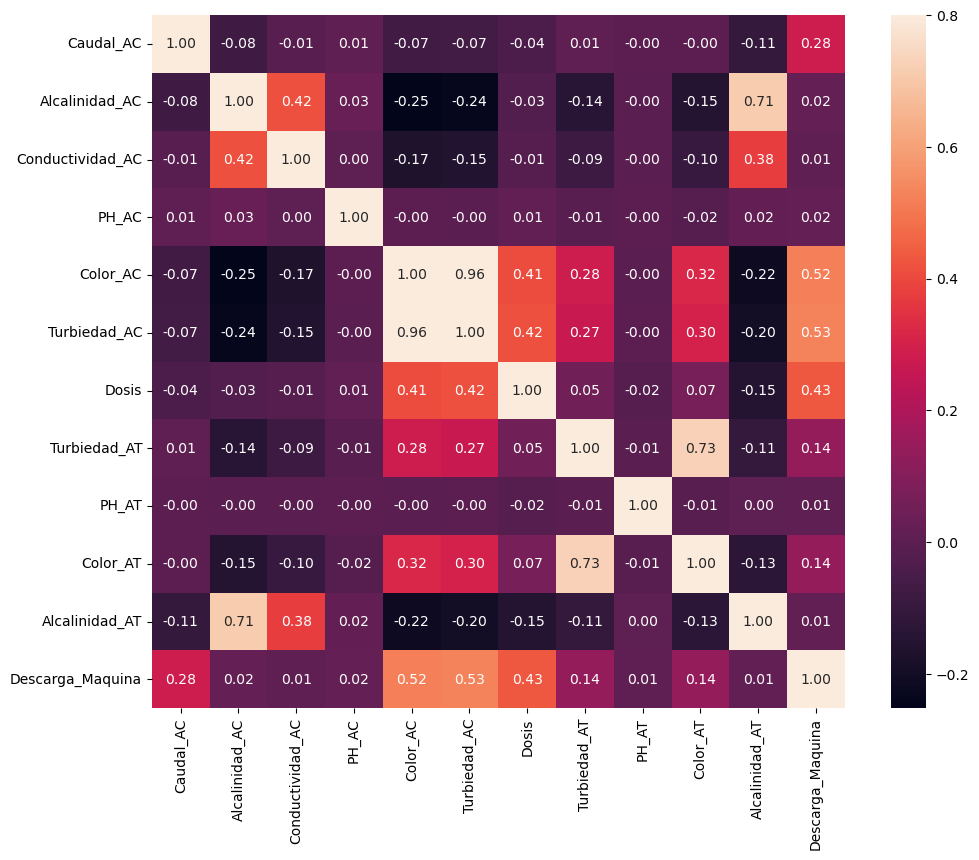

In [17]:
corrmat = df_final.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, fmt = '.2f', annot_kws = {'size': 10}, square=True);